# COGS 108 - EDA Checkpoint

# Names

- Nadia Corral
- Jose Deleon
- Christina Tyagi

<a id='research_question'></a>
# Research Question

*How did changes in the Air Quality Index from 2014 to 2018 effect the amount of respiratory diseases in the Central Valley?*

# Setup

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning: Primary Care Shortage Areas


In [23]:
#load primary care shortage areas csv
pcsa = pd.read_csv('https://data.chhs.ca.gov/dataset/061494a3-e8c7-4615-a22f-b2851d44eb09/resource/0ba7c904-2302-400a-ba27-b8e8e5c1ab4a/download/pcsa.csv')
pcsa.head()

,MSSA_COUNTY,MSSA_ID,MSSA_NAME,Total_Population,EST_Physicians,EST_FNPPA,EST_Providers,Provider_Ratio,Score_Provider_Ratio,Pop_100FPL,PCT_100FPL,Score_Poverty,Score_Total,PCSA,Effective Date
0,Alameda,1.1,Livermore Central and West/Spring Town,58273,46.0,5.0,49.8,1172.5,1,3149,0.054,1,2,No,1/30/2020
1,Alameda,1.2,Altamont/Livermore East/Midway/Mountain House/...,39930,13.5,2.7,15.5,2576.1,4,1774,0.044,0,4,No,1/30/2020
2,Alameda,2a,Berkeley South and West/Emeryville/Oakland Nor...,86595,116.0,78.7,175.0,494.8,0,20908,0.241,4,4,No,1/30/2020
3,Alameda,2b,Albany/Berkeley East and North/Claremont/Cragm...,110451,273.0,39.4,302.6,365.0,0,8701,0.079,1,1,No,1/30/2020
4,Alameda,2c,Oakland West Central,88757,361.0,48.1,397.0,223.6,0,22684,0.256,5,5,Yes,1/30/2020


In [24]:
#filter out the counties to only get counties in the central valley
pcsa_sub = pcsa.loc[(pcsa['MSSA_COUNTY'] == 'Butte') | (pcsa['MSSA_COUNTY'] == 'Colusa') | (pcsa['MSSA_COUNTY'] == 'Glenn') | 
(pcsa['MSSA_COUNTY'] == 'Fresno') | (pcsa['MSSA_COUNTY'] == 'Kern') | 
(pcsa['MSSA_COUNTY'] == 'Kings') | (pcsa['MSSA_COUNTY'] == 'Madera') | 
(pcsa['MSSA_COUNTY'] == 'Merced') | (pcsa['MSSA_COUNTY'] == 'Placer') | 
(pcsa['MSSA_COUNTY'] == 'San Joaquin') | (pcsa['MSSA_COUNTY'] == 'Sacramento') | 
(pcsa['MSSA_COUNTY'] == 'Shasta') | (pcsa['MSSA_COUNTY'] == 'Solano') | 
(pcsa['MSSA_COUNTY'] == 'Stanislaus') | (pcsa['MSSA_COUNTY'] == 'Sutter') | 
(pcsa['MSSA_COUNTY'] == 'Tehama') | (pcsa['MSSA_COUNTY'] == 'Tulare') | 
(pcsa['MSSA_COUNTY'] == 'Yolo') | (pcsa['MSSA_COUNTY'] == 'Yuba')
]
pcsa_sub

,MSSA_COUNTY,MSSA_ID,MSSA_NAME,Total_Population,EST_Physicians,EST_FNPPA,EST_Providers,Provider_Ratio,Score_Provider_Ratio,Pop_100FPL,PCT_100FPL,Score_Poverty,Score_Total,PCSA,Effective Date
20,Butte,7.1,Chapmantown/Chico,96487,55.5,63.6,103.2,935.0,0,23007,0.238,4,4,No,1/30/2020
21,Butte,7.2,Capay/Lake/Nord,5798,3.0,1.0,3.8,1525.8,2,379,0.065,1,3,No,1/30/2020
22,Butte,7.3,Butte Meadows/Cohasset/Forest Ranch,4820,0.0,0.0,0.0,NaN,5,387,0.080,1,6,Yes,1/30/2020
23,Butte,7.4,Durham,5644,0.0,0.0,0.0,NaN,5,564,0.100,1,6,Yes,1/30/2020
24,Butte,8,Magalia/Paradise/Stirling City,41358,19.0,25.2,37.9,1091.2,1,6085,0.147,2,3,No,1/30/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,Yolo,246.1,Woodland,60630,61.0,35.3,87.5,692.9,0,7451,0.123,2,2,No,1/30/2020
538,Yolo,246.2,Knights Landing,4250,0.0,0.0,0.0,NaN,5,558,0.131,2,7,Yes,1/30/2020
539,Yuba,247,Browns Valley/Brownsville/Dobbins/Oregon House,4365,0.0,2.3,1.7,2567.6,4,979,0.224,4,8,Yes,1/30/2020
540,Yuba,248,Wheatland,4492,0.0,0.0,0.0,NaN,5,439,0.098,1,6,Yes,1/30/2020


In [25]:
# only keep columns for county, total score and PCSA
pcsa_sub = pcsa_sub[['MSSA_COUNTY', 'Score_Total', 'PCSA']]

# rename county column
pcsa_sub.columns = ['County', 'Score_Total', 'PCSA']

# replace Yes and No PCSA values with binary values
def replace_with_number(value):
   
    value = value.replace("No", 0)
    value = value.replace("Yes", 1)
    
    return value
pcsa_sub = pcsa_sub.apply(replace_with_number)

# see reduced dataset
pcsa_sub
pcsa_sub.shape

(136, 3)

In [26]:
# get average score total and number of PCSA cities/areas within the county 
list_counties = pcsa_sub.County.unique()
pcsa_county = pd.DataFrame(
                   columns=['County', 'Score_Total', 'PCSAs_Total'])
for county in list_counties:
    # add total scores for each county
    ind_score_total = pcsa_sub.loc[(pcsa_sub['County'] == county)]['Score_Total'].sum()
    # add number of PCSA cites/areas
    pcsa_total = pcsa_sub.loc[(pcsa_sub['County'] == county)]['PCSA'].sum()

    pcsa_county = pcsa_county.append({'County': county, 'Score_Total': ind_score_total, 'PCSAs_Total': pcsa_total}, ignore_index=True)

In [27]:
# final clean data set
pcsa_county

,County,Score_Total,PCSAs_Total
0,Butte,41,5
1,Colusa,24,3
2,Fresno,100,13
3,Glenn,19,3
4,Kern,100,12
5,Kings,14,2
6,Madera,18,3
7,Merced,37,6
8,Placer,24,3
9,Sacramento,74,9


# Data Cleaning: Incidence Rate Report for California by County; Lung and Bronchus (All Stages^), 2014-2018

In [28]:
#load lung cancer csv
cancer = pd.read_csv('https://raw.githubusercontent.com/cgtyagi/Group062data/main/LungCancer-Sheet%201-Table%201-1.csv')
cancer.head()

,Area,Age-Adjusted Rate,Case Count,Population
0,"Alameda County, California",39.2,"3,399","8,220,232"
1,"Alpine County, California",Data Suppressed,Data Suppressed,Data Suppressed
2,"Amador County, California",56.6,205,"189,120"
3,"Butte County, California",56.4,864,"1,133,413"
4,"Calaveras County, California",45.8,202,"226,337"


In [29]:
#rename the inputs in the area column to just get the county name 
def standardize_county(str_county):
    try: 
        str_county = str_county.strip()
        
        if 'California' in str_county:
            str_county = str_county.replace('County, California', '')
            output = str_county 
        else: 
            output = np.nan
    except:
        output = np.nan

    return output

In [30]:
cancer['Area'] = cancer['Area'].apply(standardize_county)

In [31]:
cancer['Area'].unique

<bound method Series.unique of 0             Alameda 
1              Alpine 
2              Amador 
3               Butte 
4           Calaveras 
5              Colusa 
6        Contra Costa 
7           Del Norte 
8           El Dorado 
9              Fresno 
10              Glenn 
11           Humboldt 
12           Imperial 
13               Inyo 
14               Kern 
15              Kings 
16               Lake 
17             Lassen 
18        Los Angeles 
19             Madera 
20              Marin 
21           Mariposa 
22          Mendocino 
23             Merced 
24              Modoc 
25               Mono 
26           Monterey 
27               Napa 
28             Nevada 
29             Orange 
30             Placer 
31             Plumas 
32          Riverside 
33         Sacramento 
34         San Benito 
35     San Bernardino 
36          San Diego 
37      San Francisco 
38        San Joaquin 
39    San Luis Obispo 
40          San Mateo 
41      Santa Barbara 
42 

In [32]:
#filter out the counties to only get counties in the central valley
cancer_sub = cancer.loc[(cancer['Area'] == 'Butte ') | (cancer['Area'] == 'Colusa ') | (cancer['Area'] == 'Glenn ') | 
(cancer['Area'] == 'Fresno ') | (cancer['Area'] == 'Kern ') | 
(cancer['Area'] == 'Kings ') | (cancer['Area'] == 'Madera ') | 
(cancer['Area'] == 'Merced ') | (cancer['Area'] == 'Placer ') | 
(cancer['Area'] == 'San Joaquin ') | (cancer['Area'] == 'Sacramento ') | 
(cancer['Area'] == 'Shasta ') | (cancer['Area'] == 'Solano ') | 
(cancer['Area'] == 'Stanislaus ') | (cancer['Area'] == 'Sutter ') | 
(cancer['Area'] == 'Tehama ') | (cancer['Area'] == 'Tulare ') | 
(cancer['Area'] == 'Yolo ') | (cancer['Area'] == 'Yuba ')
]
cancer_sub

,Area,Age-Adjusted Rate,Case Count,Population
3,Butte,56.4,864,"1,133,413"
5,Colusa,56.0,65,"106,900"
9,Fresno,41.1,"1,863","4,884,073"
10,Glenn,55.7,93,"139,317"
14,Kern,44.4,"1,676","4,407,177"
15,Kings,41.6,253,"750,009"
19,Madera,41.3,333,"773,293"
23,Merced,45.4,530,"1,343,647"
30,Placer,42.0,"1,125","1,898,446"
33,Sacramento,50.7,"4,081","7,545,625"


In [33]:
#load deaths csv
deaths = pd.read_csv('https://raw.githubusercontent.com/cgtyagi/Group062data/main/2021-11-29_deaths_final_2014_2020_county_year_sup.csv')
deaths.head()

,Year,County,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,Count,Annotation_Code,Annotation_Desc
0,2014,Alameda,Occurrence,Total Population,Total Population,ALL,All causes (total),9357.0,NaN,NaN
1,2014,Alameda,Occurrence,Age,Under 1 year,ALL,All causes (total),105.0,NaN,NaN
2,2014,Alameda,Occurrence,Age,1-4 years,ALL,All causes (total),17.0,NaN,NaN
3,2014,Alameda,Occurrence,Age,5-14 years,ALL,All causes (total),17.0,NaN,NaN
4,2014,Alameda,Occurrence,Age,15-24 years,ALL,All causes (total),133.0,NaN,NaN


In [34]:
#filter from years 2014-2018
deaths_sub = deaths.loc[(deaths['Year'] == 2014) | (deaths['Year'] == 2015) | (deaths['Year'] == 2016) | (deaths['Year'] == 2017) | (deaths['Year'] == 2018)]
deaths_sub.head()

,Year,County,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,Count,Annotation_Code,Annotation_Desc
0,2014,Alameda,Occurrence,Total Population,Total Population,ALL,All causes (total),9357.0,NaN,NaN
1,2014,Alameda,Occurrence,Age,Under 1 year,ALL,All causes (total),105.0,NaN,NaN
2,2014,Alameda,Occurrence,Age,1-4 years,ALL,All causes (total),17.0,NaN,NaN
3,2014,Alameda,Occurrence,Age,5-14 years,ALL,All causes (total),17.0,NaN,NaN
4,2014,Alameda,Occurrence,Age,15-24 years,ALL,All causes (total),133.0,NaN,NaN


# Data Cleaning: 2014-2020 Final Deaths by Year by County

In [35]:
#filter by cause of death (chronic lower respiratory diseases)
deaths_by_respiratory = deaths_sub.loc[(deaths_sub['Cause'] == 'CLD')]
deaths_by_respiratory.head()

,Year,County,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,Count,Annotation_Code,Annotation_Desc
50,2014,Alameda,Occurrence,Total Population,Total Population,CLD,Chronic lower respiratory diseases,418.0,NaN,NaN
51,2014,Alameda,Occurrence,Gender,Female,CLD,Chronic lower respiratory diseases,219.0,NaN,NaN
52,2014,Alameda,Occurrence,Gender,Male,CLD,Chronic lower respiratory diseases,199.0,NaN,NaN
53,2014,Alameda,Occurrence,Race-Ethnicity,American Indian/Alaska Native,CLD,Chronic lower respiratory diseases,NaN,1.0,Cell suppressed for small numbers
54,2014,Alameda,Occurrence,Race-Ethnicity,Asian,CLD,Chronic lower respiratory diseases,49.0,NaN,NaN


In [36]:
#filter by relevant counties
deaths_by_respiratory_per_county = deaths_by_respiratory[(deaths_by_respiratory['County'] == 'Butte') | (deaths_by_respiratory['County'] == 'Colusa') | (deaths_by_respiratory['County'] == 'Glenn') | 
(deaths_by_respiratory['County'] == 'Fresno') | (deaths_by_respiratory['County'] == 'Kern') | 
(deaths_by_respiratory['County'] == 'Kings') | (deaths_by_respiratory['County'] == 'Madera') | 
(deaths_by_respiratory['County'] == 'Merced') | (deaths_by_respiratory['County'] == 'Placer') | 
(deaths_by_respiratory['County'] == 'San Joaquin') | (deaths_by_respiratory['County'] == 'Sacramento') | 
(deaths_by_respiratory['County'] == 'Shasta') | (deaths_by_respiratory['County'] == 'Solano') | 
(deaths_by_respiratory['County'] == 'Stanislaus') | (deaths_by_respiratory['County'] == 'Sutter') | 
(deaths_by_respiratory['County'] == 'Tehama') | (deaths_by_respiratory['County'] == 'Tulare') | 
(deaths_by_respiratory['County'] == 'Yolo') | (deaths_by_respiratory['County'] == 'Yuba')]

deaths_by_respiratory_per_county.head()

,Year,County,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,Count,Annotation_Code,Annotation_Desc
596,2014,Butte,Occurrence,Total Population,Total Population,CLD,Chronic lower respiratory diseases,163.0,NaN,NaN
597,2014,Butte,Occurrence,Gender,Female,CLD,Chronic lower respiratory diseases,80.0,NaN,NaN
598,2014,Butte,Occurrence,Gender,Male,CLD,Chronic lower respiratory diseases,83.0,NaN,NaN
599,2014,Butte,Occurrence,Race-Ethnicity,American Indian/Alaska Native,CLD,Chronic lower respiratory diseases,NaN,1.0,Cell suppressed for small numbers
600,2014,Butte,Occurrence,Race-Ethnicity,Asian,CLD,Chronic lower respiratory diseases,NaN,1.0,Cell suppressed for small numbers


In [37]:
#take NaNs in count out of filtered data
deaths_by_respiratory_per_county_clean = deaths_by_respiratory_per_county.dropna(subset = ["Count"]) 
deaths_by_respiratory_per_county_clean.head()

,Year,County,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,Count,Annotation_Code,Annotation_Desc
596,2014,Butte,Occurrence,Total Population,Total Population,CLD,Chronic lower respiratory diseases,163.0,NaN,NaN
597,2014,Butte,Occurrence,Gender,Female,CLD,Chronic lower respiratory diseases,80.0,NaN,NaN
598,2014,Butte,Occurrence,Gender,Male,CLD,Chronic lower respiratory diseases,83.0,NaN,NaN
602,2014,Butte,Occurrence,Race-Ethnicity,Hawaiian/Pacific Islander,CLD,Chronic lower respiratory diseases,0.0,NaN,NaN
605,2014,Butte,Occurrence,Race-Ethnicity,White,CLD,Chronic lower respiratory diseases,153.0,NaN,NaN


# Data Cleaning: AQI Data for 2014-2018

In [38]:
"""
Unfortunately this step took a little longer than expected because the individual datasets were so large that the jupyter notebooks 
were not able to properly load them and that was just for one year. This led to us having to manually clean the data a little bit 
within excel. Thankfully once we filtered down to California and the counties within the Central Valley this data became much easier 
to work with.
"""
aqi_2014 = pd.read_csv("AQI data/aqi_2014_final.csv")
aqi_2015 = pd.read_csv("AQI data/aqi_2015_final.csv")
aqi_2016 = pd.read_csv("AQI data/aqi_2016_final.csv")
aqi_2017 = pd.read_csv("AQI data/aqi_2017_final.csv")
aqi_2018 = pd.read_csv("AQI data/aqi_2018_final.csv")
aqiTotal = pd.concat([aqi_2014, aqi_2015, aqi_2016, aqi_2017, aqi_2018], axis=0)
aqiTotal = aqiTotal.rename(columns = {"county Name":"County", "State Name":"State"})
aqiTotal.head()

,State,County,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,California,Butte,6,7,1/1/2014,155,Unhealthy,PM2.5,06-007-0008,4
1,California,Butte,6,7,1/2/2014,77,Moderate,PM2.5,06-007-0008,4
2,California,Butte,6,7,1/3/2014,96,Moderate,PM2.5,06-007-0008,4
3,California,Butte,6,7,1/4/2014,90,Moderate,PM2.5,06-007-0008,3
4,California,Butte,6,7,1/5/2014,78,Moderate,PM2.5,06-007-0008,3


In [39]:
#Filters down to only the counties we are interested in 
aqiTotal = aqiTotal[(aqiTotal['County'] == 'Butte') | (aqiTotal['County'] == 'Colusa') | (aqiTotal['County'] == 'Glenn') | 
(aqiTotal['County'] == 'Fresno') | (aqiTotal['County'] == 'Kern') | 
(aqiTotal['County'] == 'Kings') | (aqiTotal['County'] == 'Madera') | 
(aqiTotal['County'] == 'Merced') | (aqiTotal['County'] == 'Placer') | 
(aqiTotal['County'] == 'San Joaquin') | (aqiTotal['County'] == 'Sacramento') | 
(aqiTotal['County'] == 'Shasta') | (aqiTotal['County'] == 'Solano') | 
(aqiTotal['County'] == 'Stanislaus') | (aqiTotal['County'] == 'Sutter') | 
(aqiTotal['County'] == 'Tehama') | (aqiTotal['County'] == 'Tulare') | 
(aqiTotal['County'] == 'Yolo') | (aqiTotal['County'] == 'Yuba')]

In [40]:
#Gets rid of any potential Nan values
aqiTotal = aqiTotal.dropna(subset = ["AQI"]) 
aqiTotal.head()

,State,County,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,California,Butte,6,7,1/1/2014,155,Unhealthy,PM2.5,06-007-0008,4
1,California,Butte,6,7,1/2/2014,77,Moderate,PM2.5,06-007-0008,4
2,California,Butte,6,7,1/3/2014,96,Moderate,PM2.5,06-007-0008,4
3,California,Butte,6,7,1/4/2014,90,Moderate,PM2.5,06-007-0008,3
4,California,Butte,6,7,1/5/2014,78,Moderate,PM2.5,06-007-0008,3


In [41]:
#We sort by county and date
aqiTotal = aqiTotal[["State", "County", "Date", "AQI", "Category", "Defining Parameter"]]
aqiTotal['Date'] = pd.to_datetime(aqiTotal['Date'])
aqiTotal = aqiTotal.sort_values(by=['County', "Date"])
aqiTotal.head()


,State,County,Date,AQI,Category,Defining Parameter
0,California,Butte,2014-01-01,155,Unhealthy,PM2.5
1,California,Butte,2014-01-02,77,Moderate,PM2.5
2,California,Butte,2014-01-03,96,Moderate,PM2.5
3,California,Butte,2014-01-04,90,Moderate,PM2.5
4,California,Butte,2014-01-05,78,Moderate,PM2.5


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

[Text(0, 0, 'Butte'),
 Text(1, 0, 'Colusa'),
 Text(2, 0, 'Fresno'),
 Text(3, 0, 'Glenn'),
 Text(4, 0, 'Kern'),
 Text(5, 0, 'Kings'),
 Text(6, 0, 'Madera'),
 Text(7, 0, 'Merced'),
 Text(8, 0, 'Placer'),
 Text(9, 0, 'Sacramento'),
 Text(10, 0, 'San Joaquin'),
 Text(11, 0, 'Shasta'),
 Text(12, 0, 'Solano'),
 Text(13, 0, 'Stanislaus'),
 Text(14, 0, 'Sutter'),
 Text(15, 0, 'Tehama'),
 Text(16, 0, 'Tulare'),
 Text(17, 0, 'Yolo')]

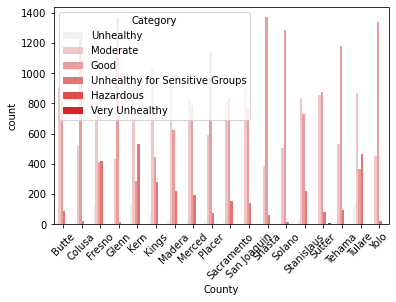

In [46]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER 
chart = sns.countplot(x='County', hue = "Category",
                      data=aqiTotal, color = 'red')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
